In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

### Introduce Data

In [12]:
df = pd.read_csv('canada_per_capita_income.txt')

In [13]:
# Check the first 5 entries

df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [14]:
# Check for basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


### Let's visualize what we are working with

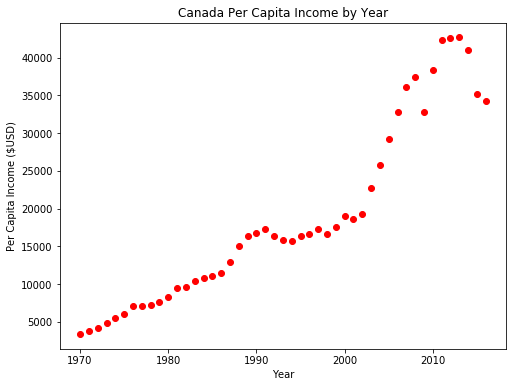

In [15]:
plt.figure(figsize = (8,6))
plt.title('Canada Per Capita Income by Year')

plt.scatter(df['year'], df['per capita income (US$)'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Per Capita Income ($USD)')

plt.show()

### Model Training

In [16]:
# It looks linear enough to where a linear regression can be viable
# Let's isolate the independent variable

new_df = df.drop('per capita income (US$)', axis = 1)
new_df

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [17]:
# Incorporate the linear regression function from sklearn
# Let's also train the model based on the data 

reg = linear_model.LinearRegression()
reg.fit(new_df[['year']], df['per capita income (US$)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Let the model predict the per capita income for a specific year

reg.predict([[2020]])

array([41288.69409442])

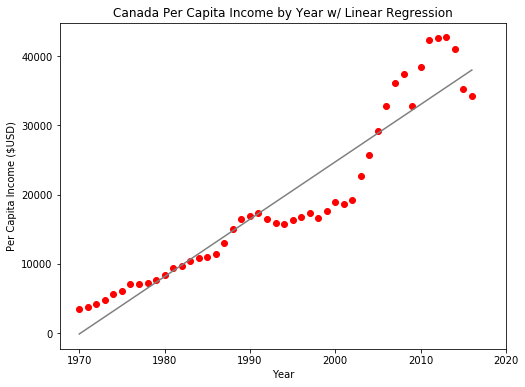

In [21]:
# Now I am going to plot the linear regression the scatter plot from earlier

plt.figure(figsize = (8,6))
plt.title('Canada Per Capita Income by Year w/ Linear Regression')

plt.scatter(df['year'], df['per capita income (US$)'], color = 'red')
plt.plot(df['year'], reg.predict(df[['year']]), color = 'grey')   # for the reg.predict, given x year, what is the corresponding output based on the pattern it learned from the data we gave it in the 7th block

plt.xlabel('Year')
plt.ylabel('Per Capita Income ($USD)')

plt.xticks(np.arange(1970, 2030, 10))

plt.show()

In [20]:
# Add the years from 2017 - 2020 into the graph above based on values produced from linear regression model